In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\mushrooms.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
df = pd.read_csv(path,encoding = 'ascii')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
#We see there are 8124 rows and 23 columns.

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
#From the above we observe that all are Object types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
#We dont see any null values

In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [13]:
#We checked the uniquesness and see two i.e p and e we mark this as the label

In [14]:
count=df['class'].value_counts()
count

e    4208
p    3916
Name: class, dtype: int64

In [15]:
#From the above we see ther are 4208 e and 3916 p which seems to be balanced.We would plot it to visualize

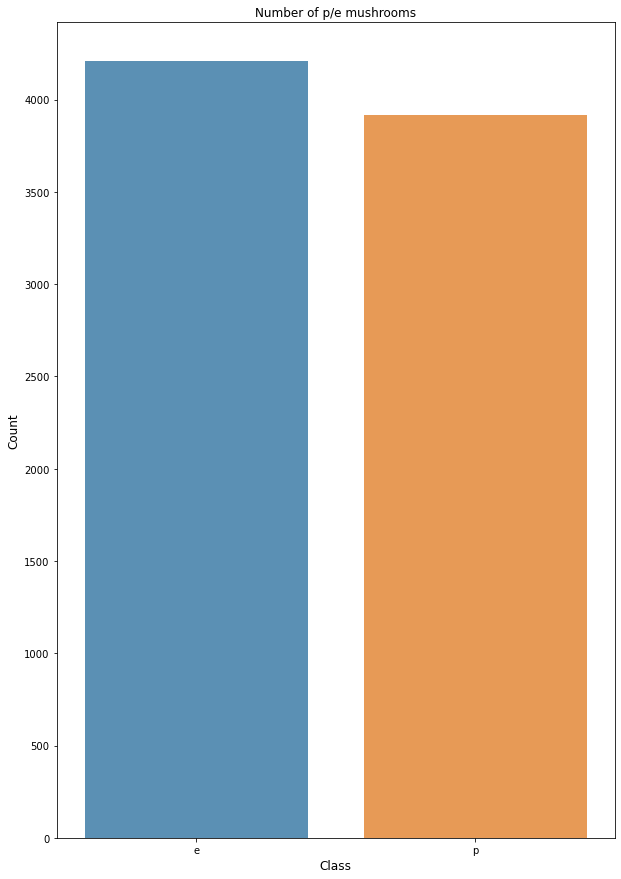

In [19]:
plt.figure(figsize=(10,15))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of p/e mushrooms')
plt.show()
    

In [21]:
#From the above we have used the box plot and see the difference it seems to be balanced there is no requirement of any up/down scaling

In [22]:
#To process anything further we see the data in all string let us convert it into numeric.

In [23]:
l_enc=LabelEncoder()

In [26]:
for column in df.columns:
    df[column] = l_enc.fit_transform(df[column])
df.head()    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [27]:
#from the above we see all the values has been coded into numeric,comparing to above the Label  1 is p and 0 is e.

In [29]:
#upon observation we see veil-type all the values are 0 so ill chck more further
df.tail(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8104,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,3,4,2
8105,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,8,4,2
8106,0,3,2,4,0,5,0,0,0,6,...,2,5,5,0,1,1,4,3,4,2
8107,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,3,1,2
8108,1,3,3,2,0,8,1,0,1,0,...,2,6,7,0,2,1,0,7,4,2
8109,0,0,2,8,0,5,1,1,0,10,...,2,7,7,0,2,2,4,7,2,1
8110,0,5,2,4,0,5,0,0,0,6,...,2,5,5,0,1,1,4,3,4,2
8111,0,3,2,8,0,5,1,1,0,7,...,2,7,7,0,2,2,4,7,2,1
8112,0,3,2,4,0,5,0,0,0,6,...,2,5,5,0,0,1,4,0,4,2
8113,1,3,3,2,0,8,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0


In [30]:
df.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [31]:
#I would drop veil-type as all the values seems to be 0

df=df.drop(["veil-type"],axis=1)

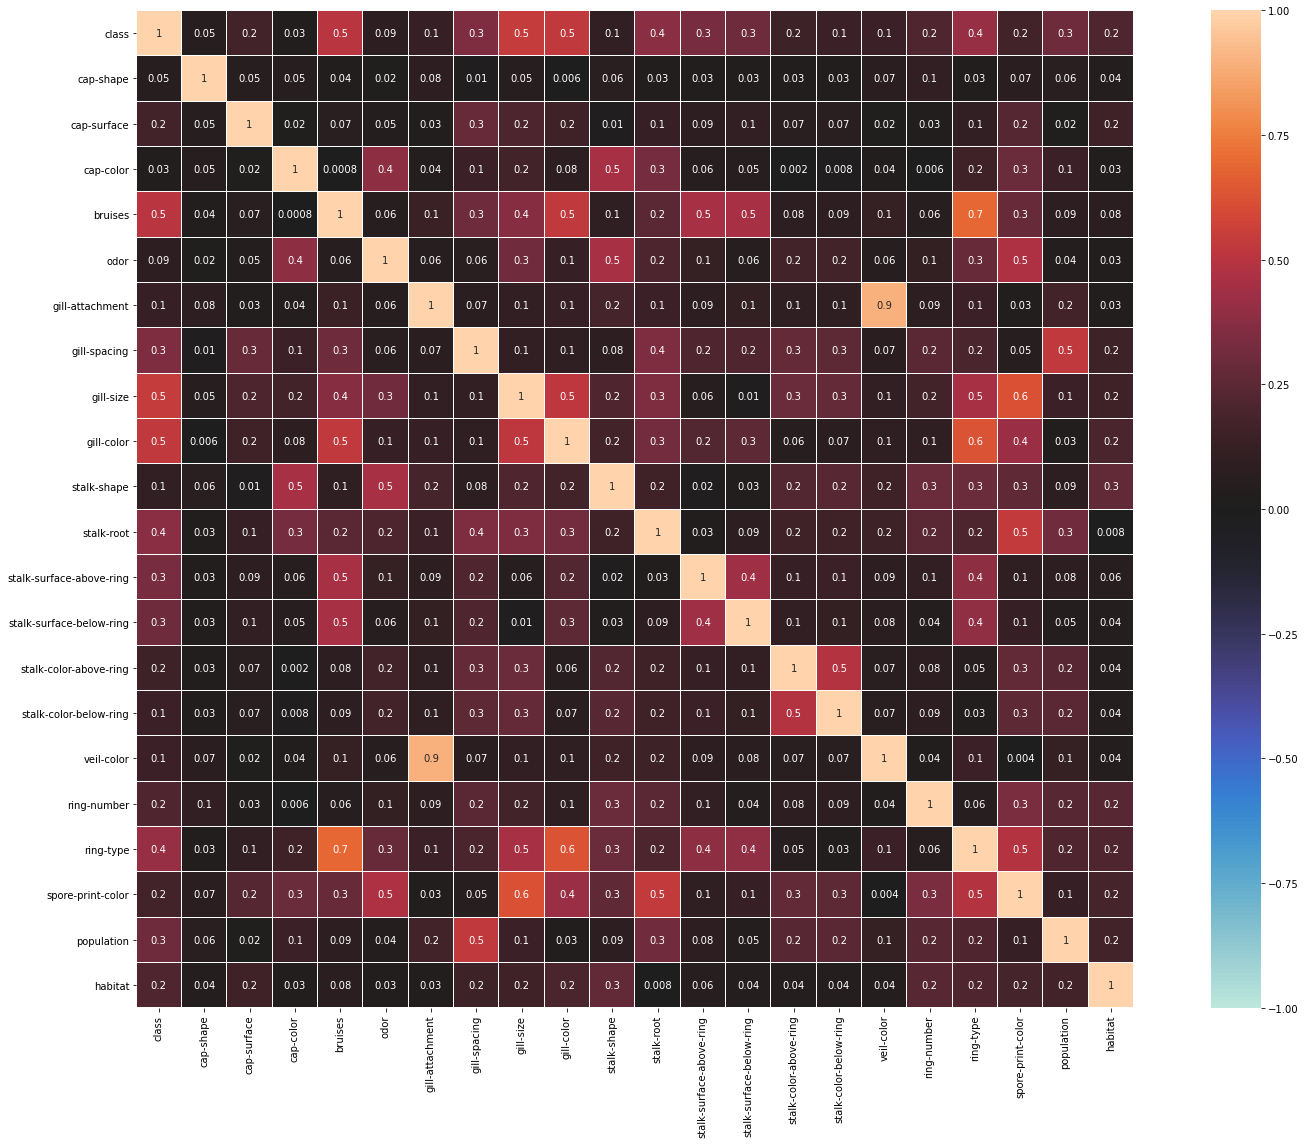

In [37]:
#Checking if there are any multicolliearity amongst the features i would use Heat Map here :

df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr , vmin=-1 , vmax=1 , annot=True,
            square=True , center=0 , fmt = '.1g' , linewidths=.1)
plt.tight_layout()

In [39]:
x= df.drop(['class'],axis=1)
y=df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)


# Using Logistic Regression :


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9635647464303299

In [50]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1019,   38],
       [  36,  938]], dtype=int64)

In [51]:
#Area under Curve

auc=roc_auc_score(y_test,y_pred)
auc

0.963544105105496

In [53]:
#ROC
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
fpr

array([0.       , 0.0359508, 1.       ])

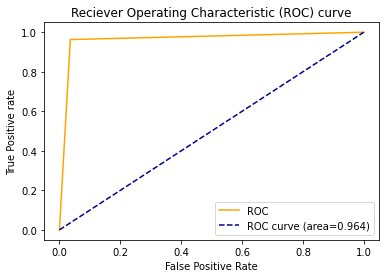

In [55]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever Operating Characteristic (ROC) curve')
plt.legend()
plt.show()